In [1]:
import numpy as np
import pandas as pd 

In [2]:
df=pd.read_csv(r'C:\Users\hp\Desktop\Data\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi'].fillna(int(df['bmi'].mean()), inplace = True)

In [6]:
df.isnull().count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [8]:
for var in categorical:
    
    print(df[var].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [9]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
df.groupby('stroke').heart_disease.value_counts()

stroke  heart_disease
0       0                4632
        1                 229
1       0                 202
        1                  47
Name: heart_disease, dtype: int64

In [11]:
df.groupby('stroke').work_type.value_counts()

stroke  work_type    
0       Private          2776
        Self-employed     754
        children          685
        Govt_job          624
        Never_worked       22
1       Private           149
        Self-employed      65
        Govt_job           33
        children            2
Name: work_type, dtype: int64

In [12]:
df.groupby('stroke').smoking_status.value_counts()

stroke  smoking_status 
0       never smoked       1802
        Unknown            1497
        formerly smoked     815
        smokes              747
1       never smoked         90
        formerly smoked      70
        Unknown              47
        smokes               42
Name: smoking_status, dtype: int64

In [13]:
dfa = df.drop(['id','gender','ever_married'] ,axis = 1)
dfa

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,61.0,0,0,Self-employed,Rural,202.21,28.0,never smoked,1
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,Urban,83.75,28.0,never smoked,0
5106,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
x = dfa.drop(['stroke'], axis=1)

y = dfa['stroke']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [16]:
x_train.shape, x_test.shape

((3577, 8), (1533, 8))

In [17]:
x_train.dtypes

age                  float64
hypertension           int64
heart_disease          int64
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [18]:
import category_encoders as ce

In [19]:
encoder = ce.OrdinalEncoder(cols=['work_type','Residence_type','smoking_status'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [20]:
x_train.shape, x_test.shape

((3577, 8), (1533, 8))

In [21]:
x_train.dtypes

age                  float64
hypertension           int64
heart_disease          int64
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
dtype: object

In [22]:
x_test.dtypes

age                  float64
hypertension           int64
heart_disease          int64
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
dtype: object

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf_gini =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 

clf_gini.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [1]:
y_pred_gini = clf_gini.predict(x_test)

NameError: name 'clf_gini' is not defined

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9498


In [26]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9522
Test set score: 0.9498


In [27]:
y_train = y_train.map({0:"Stroke",1:"No stroke"})

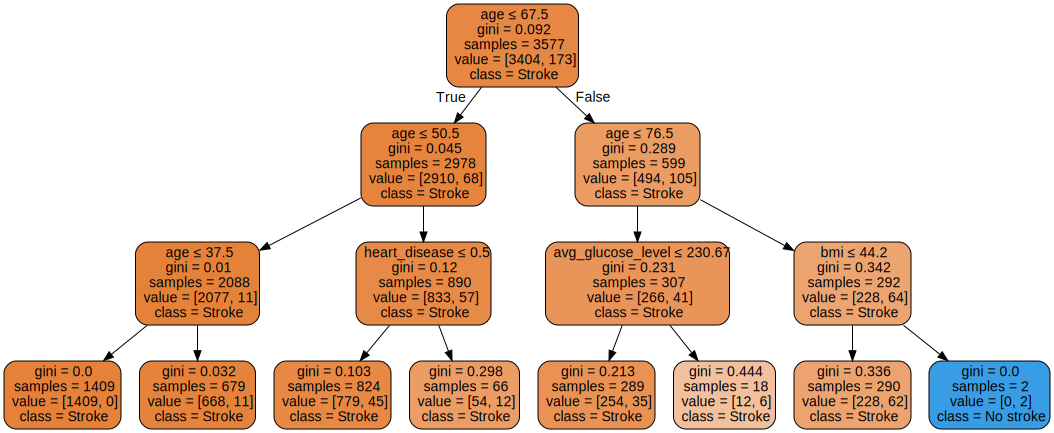

In [28]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 

graph
